# How to Train YOLOv8 Object Detection on a Custom Dataset

---


Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

In [1]:
!nvidia-smi

Mon Dec 23 07:46:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


# Dataset Description: Gauge Detection Computer Vision Project

This dataset is designed for a gauge detection task in a computer vision project. It consists of annotated images featuring various gauges, with the following characteristics:

## Key Features
- **Annotations**:
  - Needle tip position.
  - Needle base position.
  - Minimum and maximum values of the gauge.
- **Number of Images**: Approximately 5,000 high-quality images.
- **Data Augmentation**: Includes multiple augmented versions of images to improve model robustness. Augmentations may involve:
  - Rotation
  - Scaling
  - Brightness and contrast adjustments
  - Flipping or other transformations.

## Applications
This dataset is ideal for training and testing machine learning models aimed at:
- Detecting the position of the needle on a gauge.
- Interpreting gauge readings based on the annotated minimum and maximum values.

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JHPHke97IqNyfxLaa0FY")
project = rf.workspace("aditya07").project("gauge-detection-cohbz-zerqg")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gauge-detection-1 in yolov8:: 100%|██████████| 9736/9736 [00:04<00:00, 2149.43it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=800 plots=True   #increase to 25 epochs

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 219MB/s]
New https://pypi.org/project/ultralytics/8.3.53 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Gauge-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

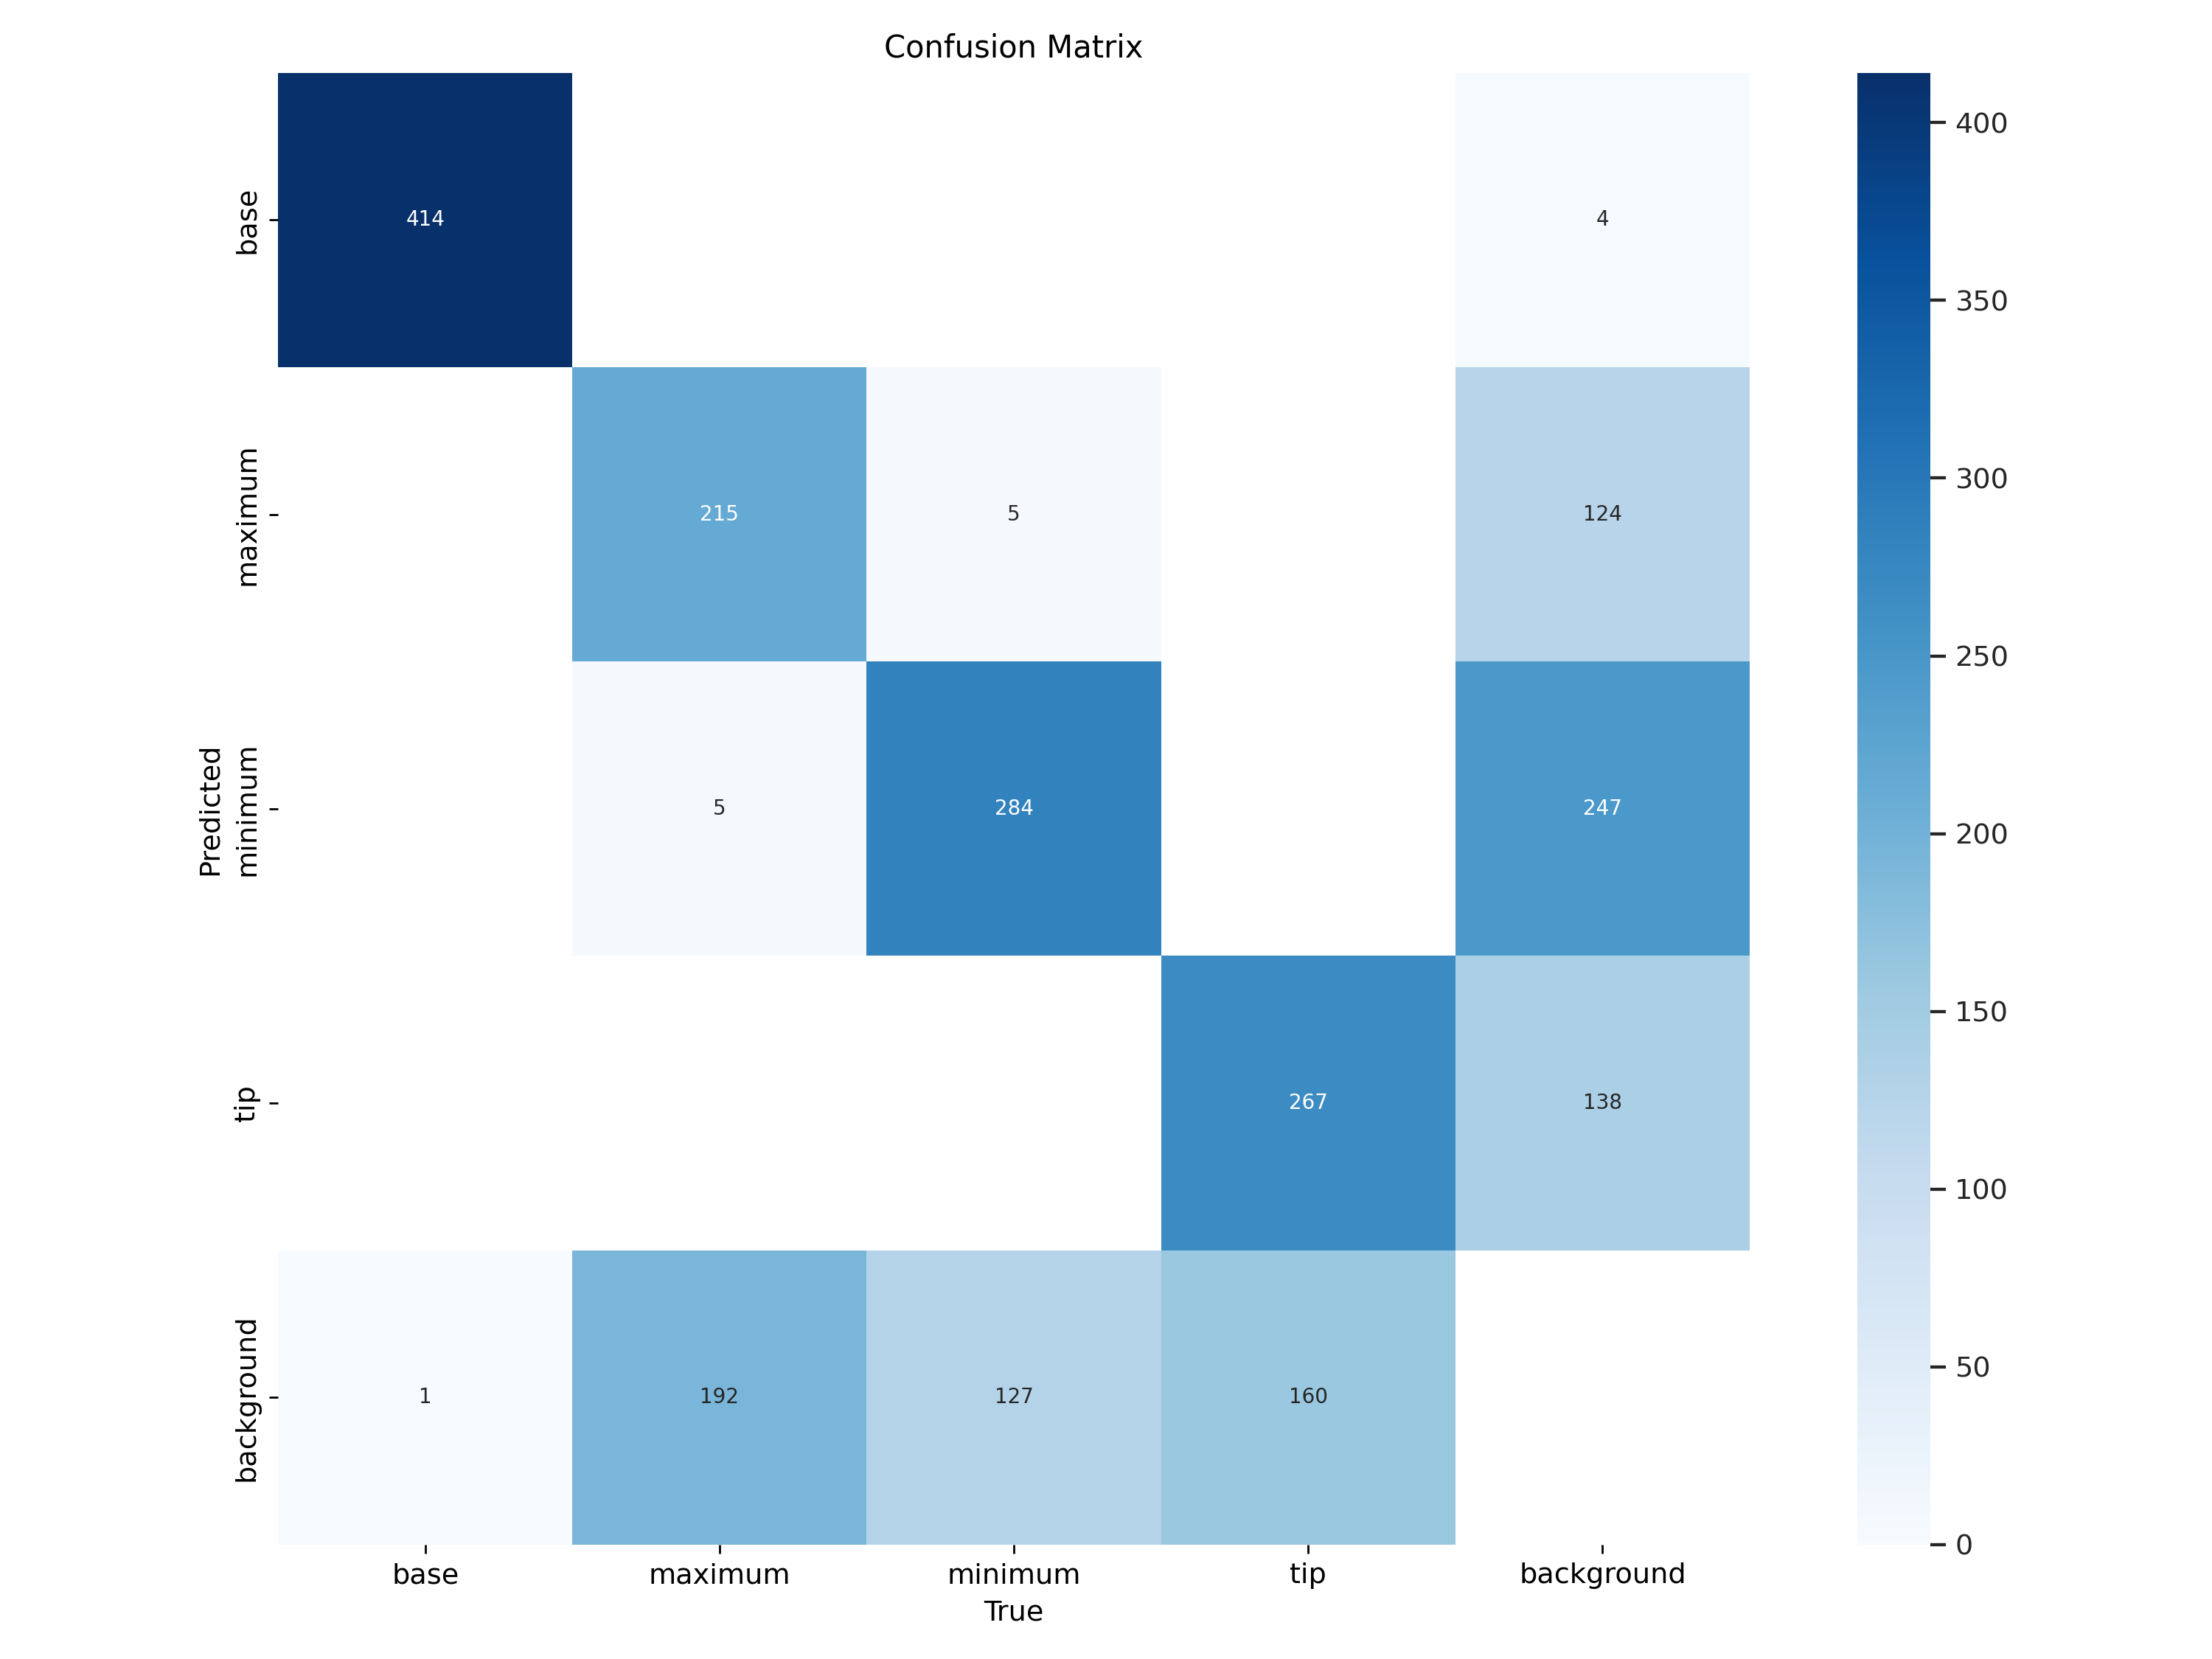

In [10]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


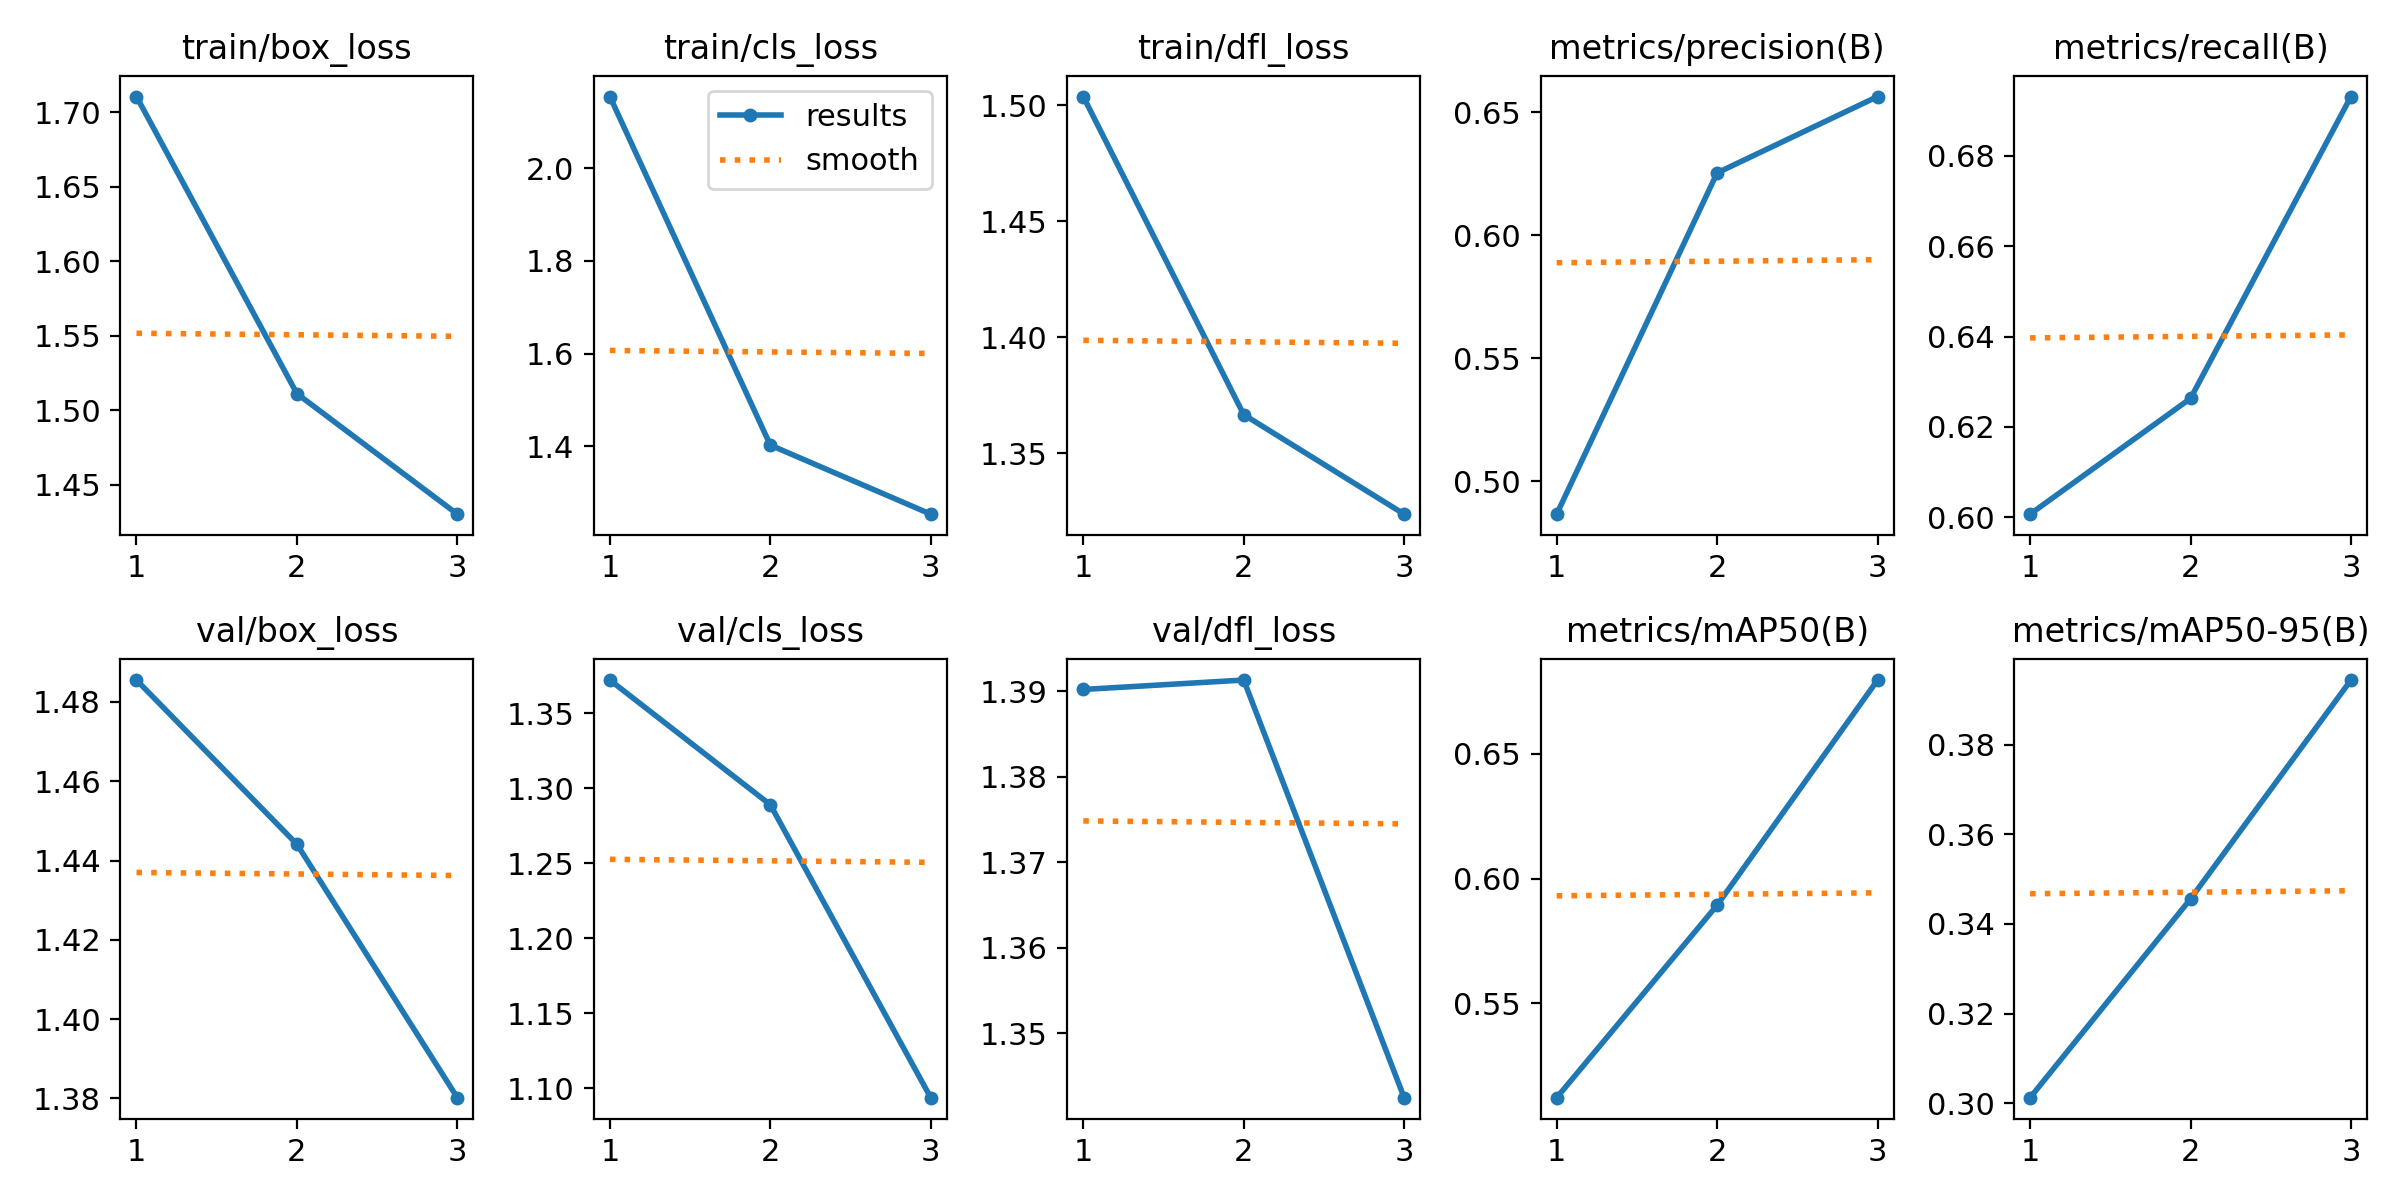

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


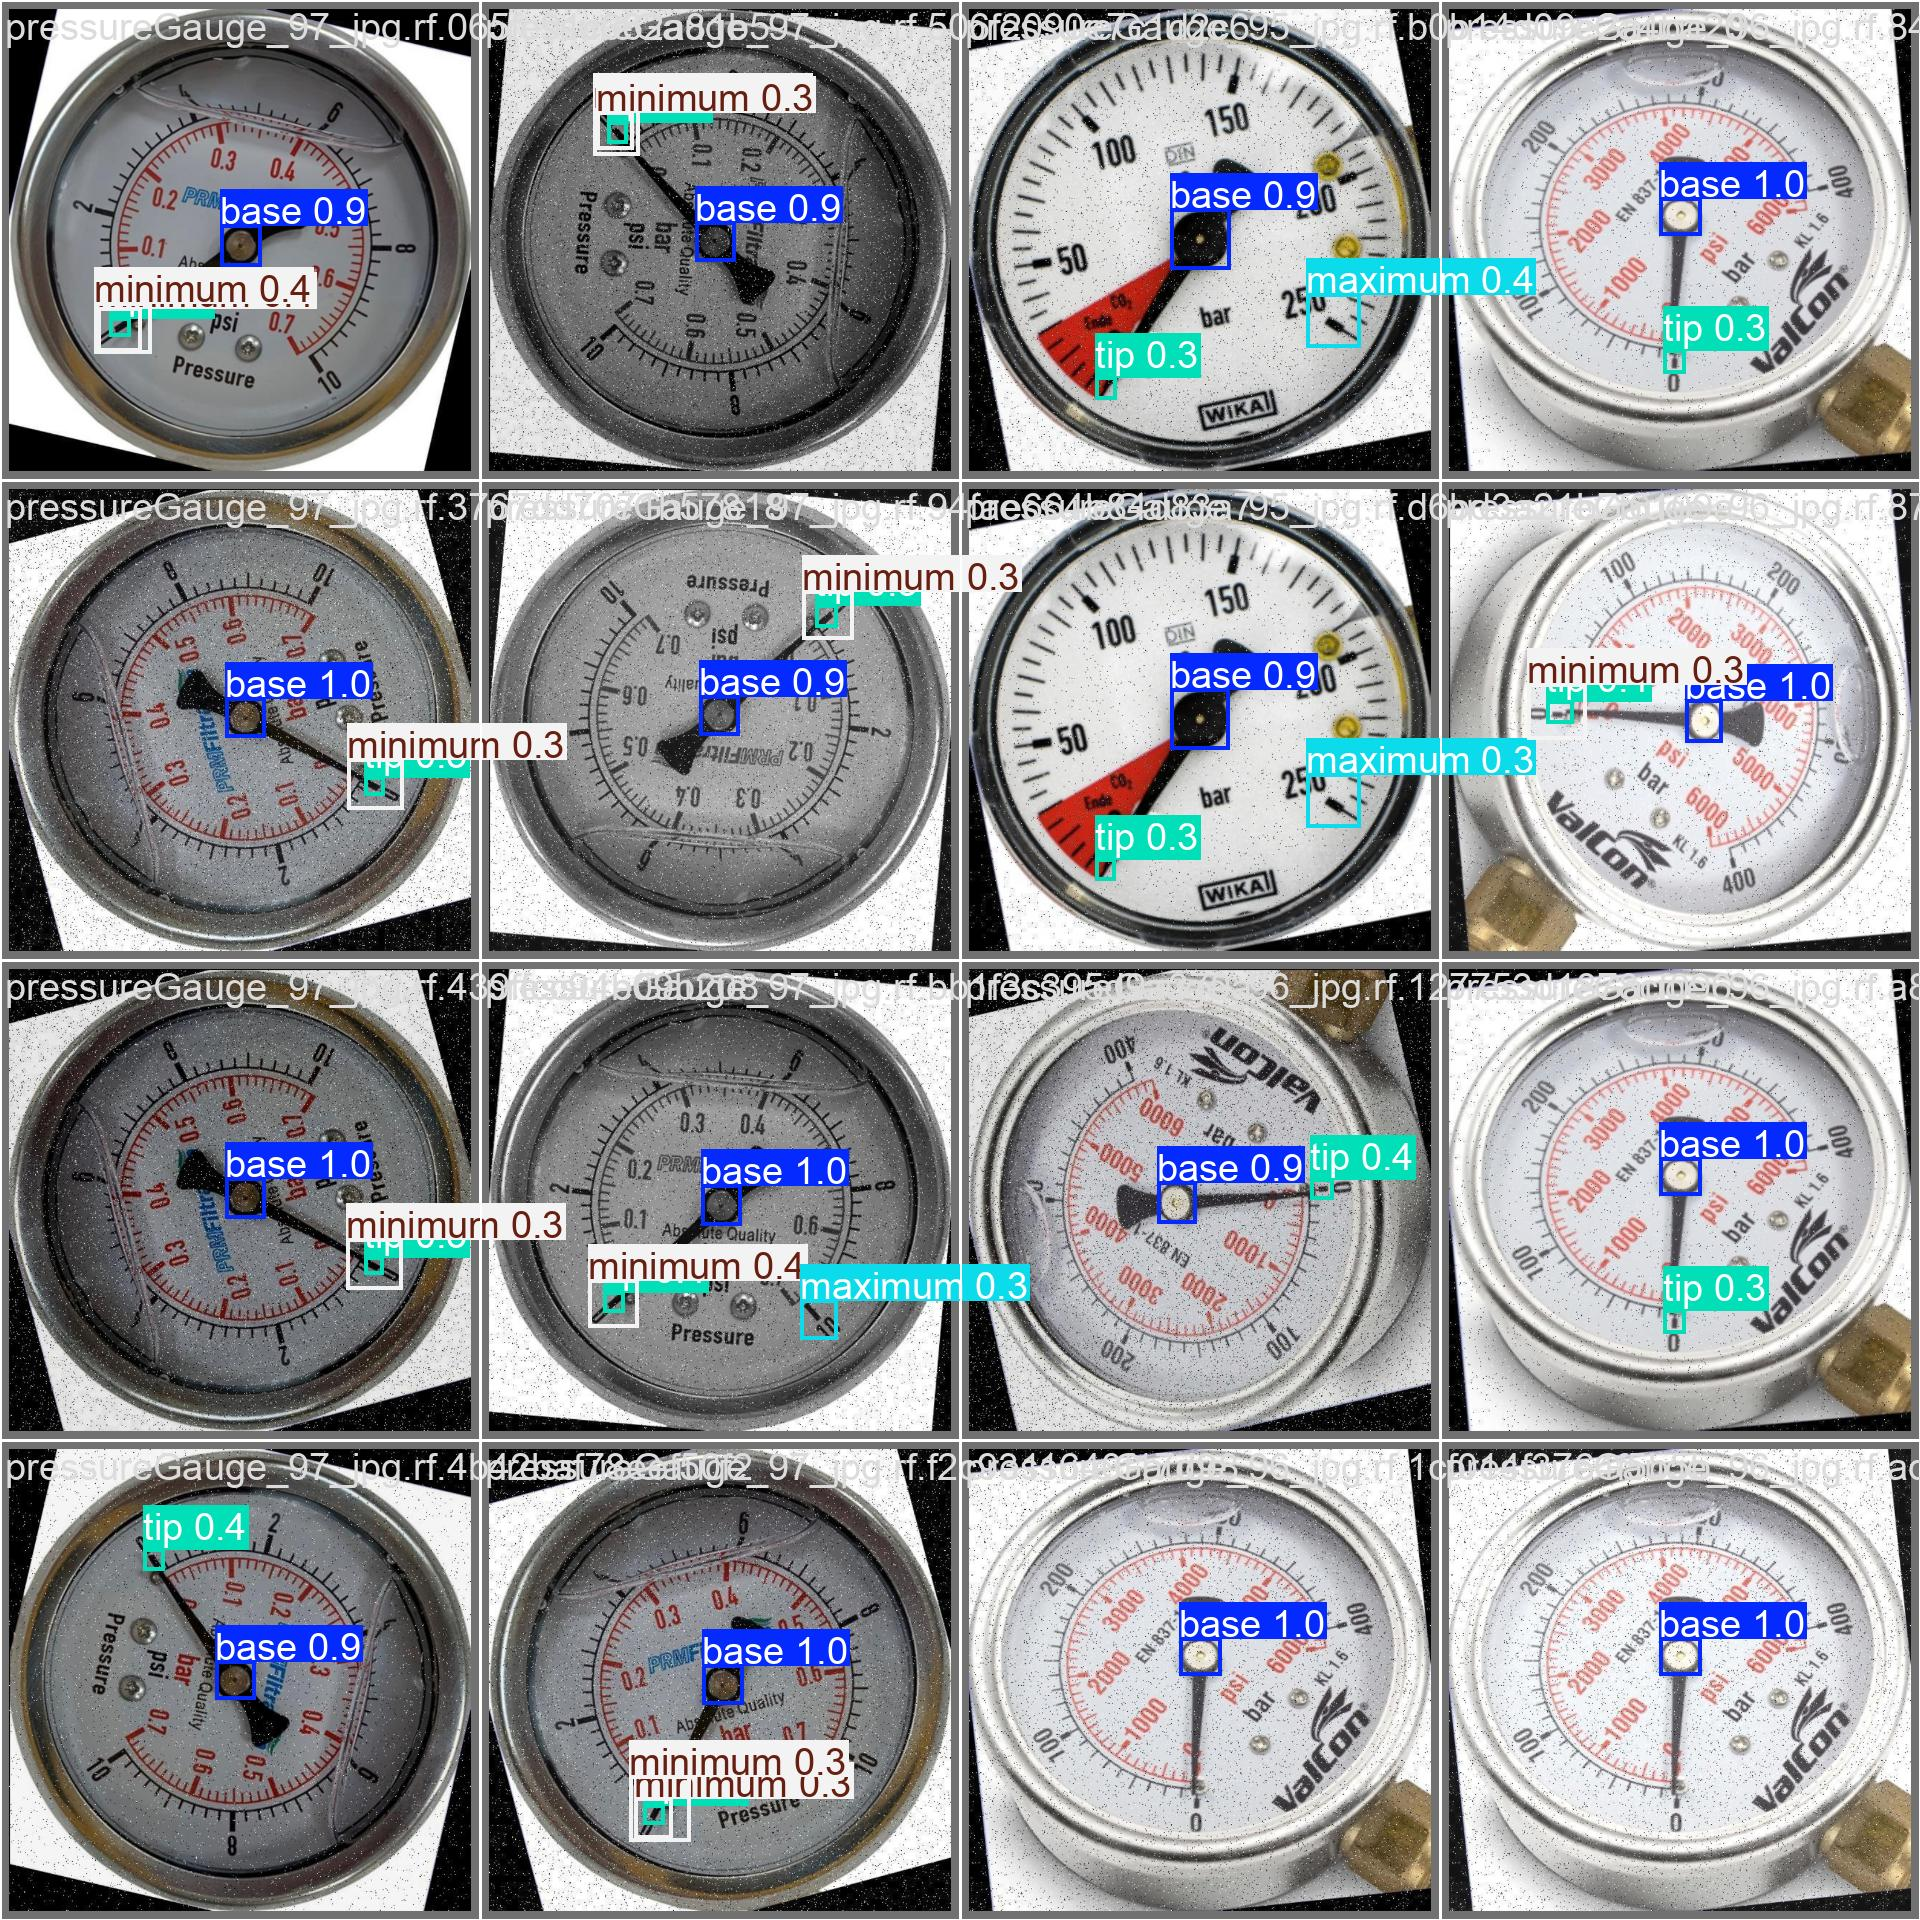

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Gauge-detection-1/valid/labels.cache... 415 images, 0 backgrounds, 0 corrupt: 100% 415/415 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:09<00:00,  2.69it/s]
                   all        415       1670      0.658      0.693      0.681      0.395
                  base        415        415      0.989      0.998      0.995      0.862
               maximum        412        412      0.557        0.5      0.545      0.253
               minimum        414        416      0.483      0.672      0.567      0.242
                   tip        415        427      0.601      0.604      0.616      0.223
Speed: 1.3ms preprocess, 13.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
💡 